# 基于MindSpore实现梯度下降算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mindspore import Tensor

## 数据准备
使用numpy生成数据，之后使用mindspore的tensor进行转换：

In [2]:
def data_generate():
    x = np.array([55,71,68,87,101,87,75,78,93,73])
    y = np.array([91,101,87,109,129,98,95,101,104,93])

    x = Tensor(x.astype(np.float32))
    y = Tensor(y.astype(np.float32))
    return x,y

## 解析解
线性回归的解可以用一个公式简单地表达出来， 这类解叫作解析解（analytical solution）

In [3]:
def ols_algebra(x, y):
    '''
    解析解
    '''
    n = len(x)
    w1 = (n*sum(x*y) - sum(x)*sum(y)) / (n*sum(x*x) - sum(x)*sum(x))
    w0 = (sum(x*x)*sum(y) - sum(x)*sum(x*y)) / (n*sum(x*x) - sum(x)*sum(x))

    return w1,w0

## 梯度下降解

In [4]:
def ols_gradient_descent(x,y,lr,num_iter):
    '''
    梯度下降解
    lr: 学习率
    num_iter: 迭代次数
    '''
    w1 = 0
    w0 = 0
    for i in range(num_iter):
        y_hat = (w1 * x)+ w0
        w1_gradient = -2 * sum(x*(y-y_hat))
        w0_gradient = -2*sum(y-y_hat)
        w1 -=lr * w1_gradient
        w0 -= lr* w0_gradient
    return w1,w0

## 绘图进行比较

In [5]:
def plot_pic(w1,w0,w1_,w0_,x,y):
    '''
    画图
    '''
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    w1 = w1.asnumpy()
    w0 = w0.asnumpy()
    w1_ = w1_.asnumpy()
    w0_ = w0_.asnumpy()
    x = x.asnumpy()
    y = y.asnumpy()

    axes[0].scatter(x,y)
    axes[0].plot(np.array([50,110]), np.array([50,110])*w1 + w0, 'r')
    axes[0].set_title("OLS")

    axes[1].scatter(x,y)
    axes[1].plot(np.array([50,110]), np.array([50,110])*w1_ + w0_, 'r')
    axes[1].set_title("Gradient descent")

    plt.show()

## 执行

0.7175629
44.256042
1.2633123
0.12807482


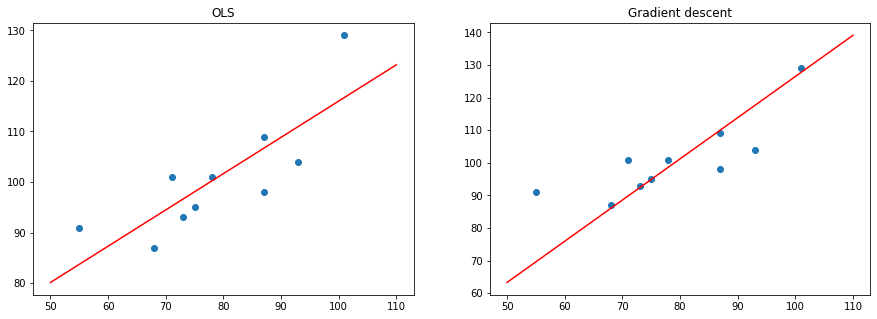

1.2244889
3.2672513


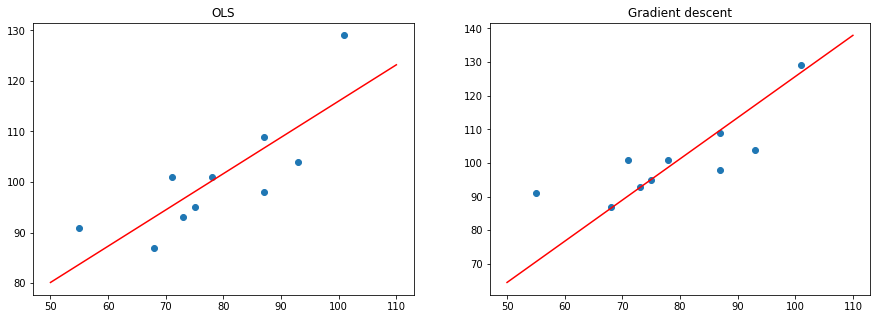

In [6]:
x,y = data_generate()

w1,w0 = ols_algebra(x,y)
print(w1)
print(w0)

w1_,w0_ = ols_gradient_descent(x,y,lr = 0.00001, num_iter = 500)
print(w1_)
print(w0_)

plot_pic(w1,w0,w1_,w0_,x,y)

w1_,w0_ = ols_gradient_descent(x,y,lr = 0.00001, num_iter = 15000)
print(w1_)
print(w0_)

plot_pic(w1,w0,w1_,w0_,x,y)